In [5]:
import pandas as pd
import numpy as np

In [6]:
df1 = pd.read_csv('Kickstarter.csv', encoding='latin-1')
df1.head()

,name,category,deadline,goal,pledged,status,backers
0,Safer Home,Hardware,3/7/2015 5:52,50000.0,0.0,failed,0
1,Gizbee Unlimited Removable Storage for Your T...,Gadgets,25/3/2016 19:30,87000.0,2030.0,canceled,15
2,Diposta - liberating people from their postal ...,Web,23/8/2016 13:18,100000.0,141.0,failed,3
3,Best Spray Bottle Ever - SureShot,Gadgets,7/3/2015 16:57,25000.0,3.0,failed,3
4,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,25/5/2015 20:04,50000.0,11336.0,canceled,19


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15995 entries, 0 to 15994
Data columns (total 7 columns):
name         15995 non-null object
category     15995 non-null object
deadline     15995 non-null object
goal         15995 non-null float64
pledged      15995 non-null float64
status       15995 non-null object
backers      15995 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 874.9+ KB


In [9]:
data_types = df1.dtypes

In [10]:
data_types

name          object
category      object
deadline      object
goal         float64
pledged      float64
status        object
backers        int64
dtype: object

In [16]:
# Convert to datetime data type
df1['deadline '] = pd.to_datetime(df1['deadline '], format='%d/%m/%Y %H:%M')

In [19]:
# Extract only the year
df1['Year'] = df1['deadline '].dt.year

In [21]:
df1.head()

,name,category,deadline,goal,pledged,status,backers,Year
0,Safer Home,Hardware,2015-07-03 05:52:00,50000.0,0.0,failed,0,2015
1,Gizbee Unlimited Removable Storage for Your T...,Gadgets,2016-03-25 19:30:00,87000.0,2030.0,canceled,15,2016
2,Diposta - liberating people from their postal ...,Web,2016-08-23 13:18:00,100000.0,141.0,failed,3,2016
3,Best Spray Bottle Ever - SureShot,Gadgets,2015-03-07 16:57:00,25000.0,3.0,failed,3,2015
4,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,2015-05-25 20:04:00,50000.0,11336.0,canceled,19,2015


In [23]:
# Calculate total number of projects by category and year
project_count = df1.groupby(['category ', 'Year']).size().reset_index(name='Project Count')

In [25]:
print(project_count)

       category   Year  Project Count
0    3D Printing  2013             16
1    3D Printing  2014             86
2    3D Printing  2015            153
3    3D Printing  2016             81
4    3D Printing  2017              2
..           ...   ...            ...
104          Web  2013              3
105          Web  2014            495
106          Web  2015            953
107          Web  2016            482
108          Web  2017             16

[109 rows x 3 columns]


In [26]:
# Get unique categories using unique()
unique_categories = df1['category '].unique()
print("Unique categories (using unique()):", unique_categories)

Unique categories (using unique()): ['Hardware' 'Gadgets' 'Web' 'Apps' 'Technology' 'Software' 'Flight'
 'Makerspaces' 'Fabrication Tools' 'Sound' 'DIY Electronics'
 'Camera Equipment' '3D Printing' 'Wearables' 'Space Exploration' 'Robots']


In [27]:
# Merge the project_count DataFrame with the original DataFrame
df1 = pd.merge(df1, project_count, on=['category ', 'Year'], how='left')

In [29]:
df1.head()

,name,category,deadline,goal,pledged,status,backers,Year,Project Count
0,Safer Home,Hardware,2015-07-03 05:52:00,50000.0,0.0,failed,0,2015,463
1,Gizbee Unlimited Removable Storage for Your T...,Gadgets,2016-03-25 19:30:00,87000.0,2030.0,canceled,15,2016,468
2,Diposta - liberating people from their postal ...,Web,2016-08-23 13:18:00,100000.0,141.0,failed,3,2016,482
3,Best Spray Bottle Ever - SureShot,Gadgets,2015-03-07 16:57:00,25000.0,3.0,failed,3,2015,613
4,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,2015-05-25 20:04:00,50000.0,11336.0,canceled,19,2015,1300


In [30]:
df1.to_csv('Visual.csv',index=False)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

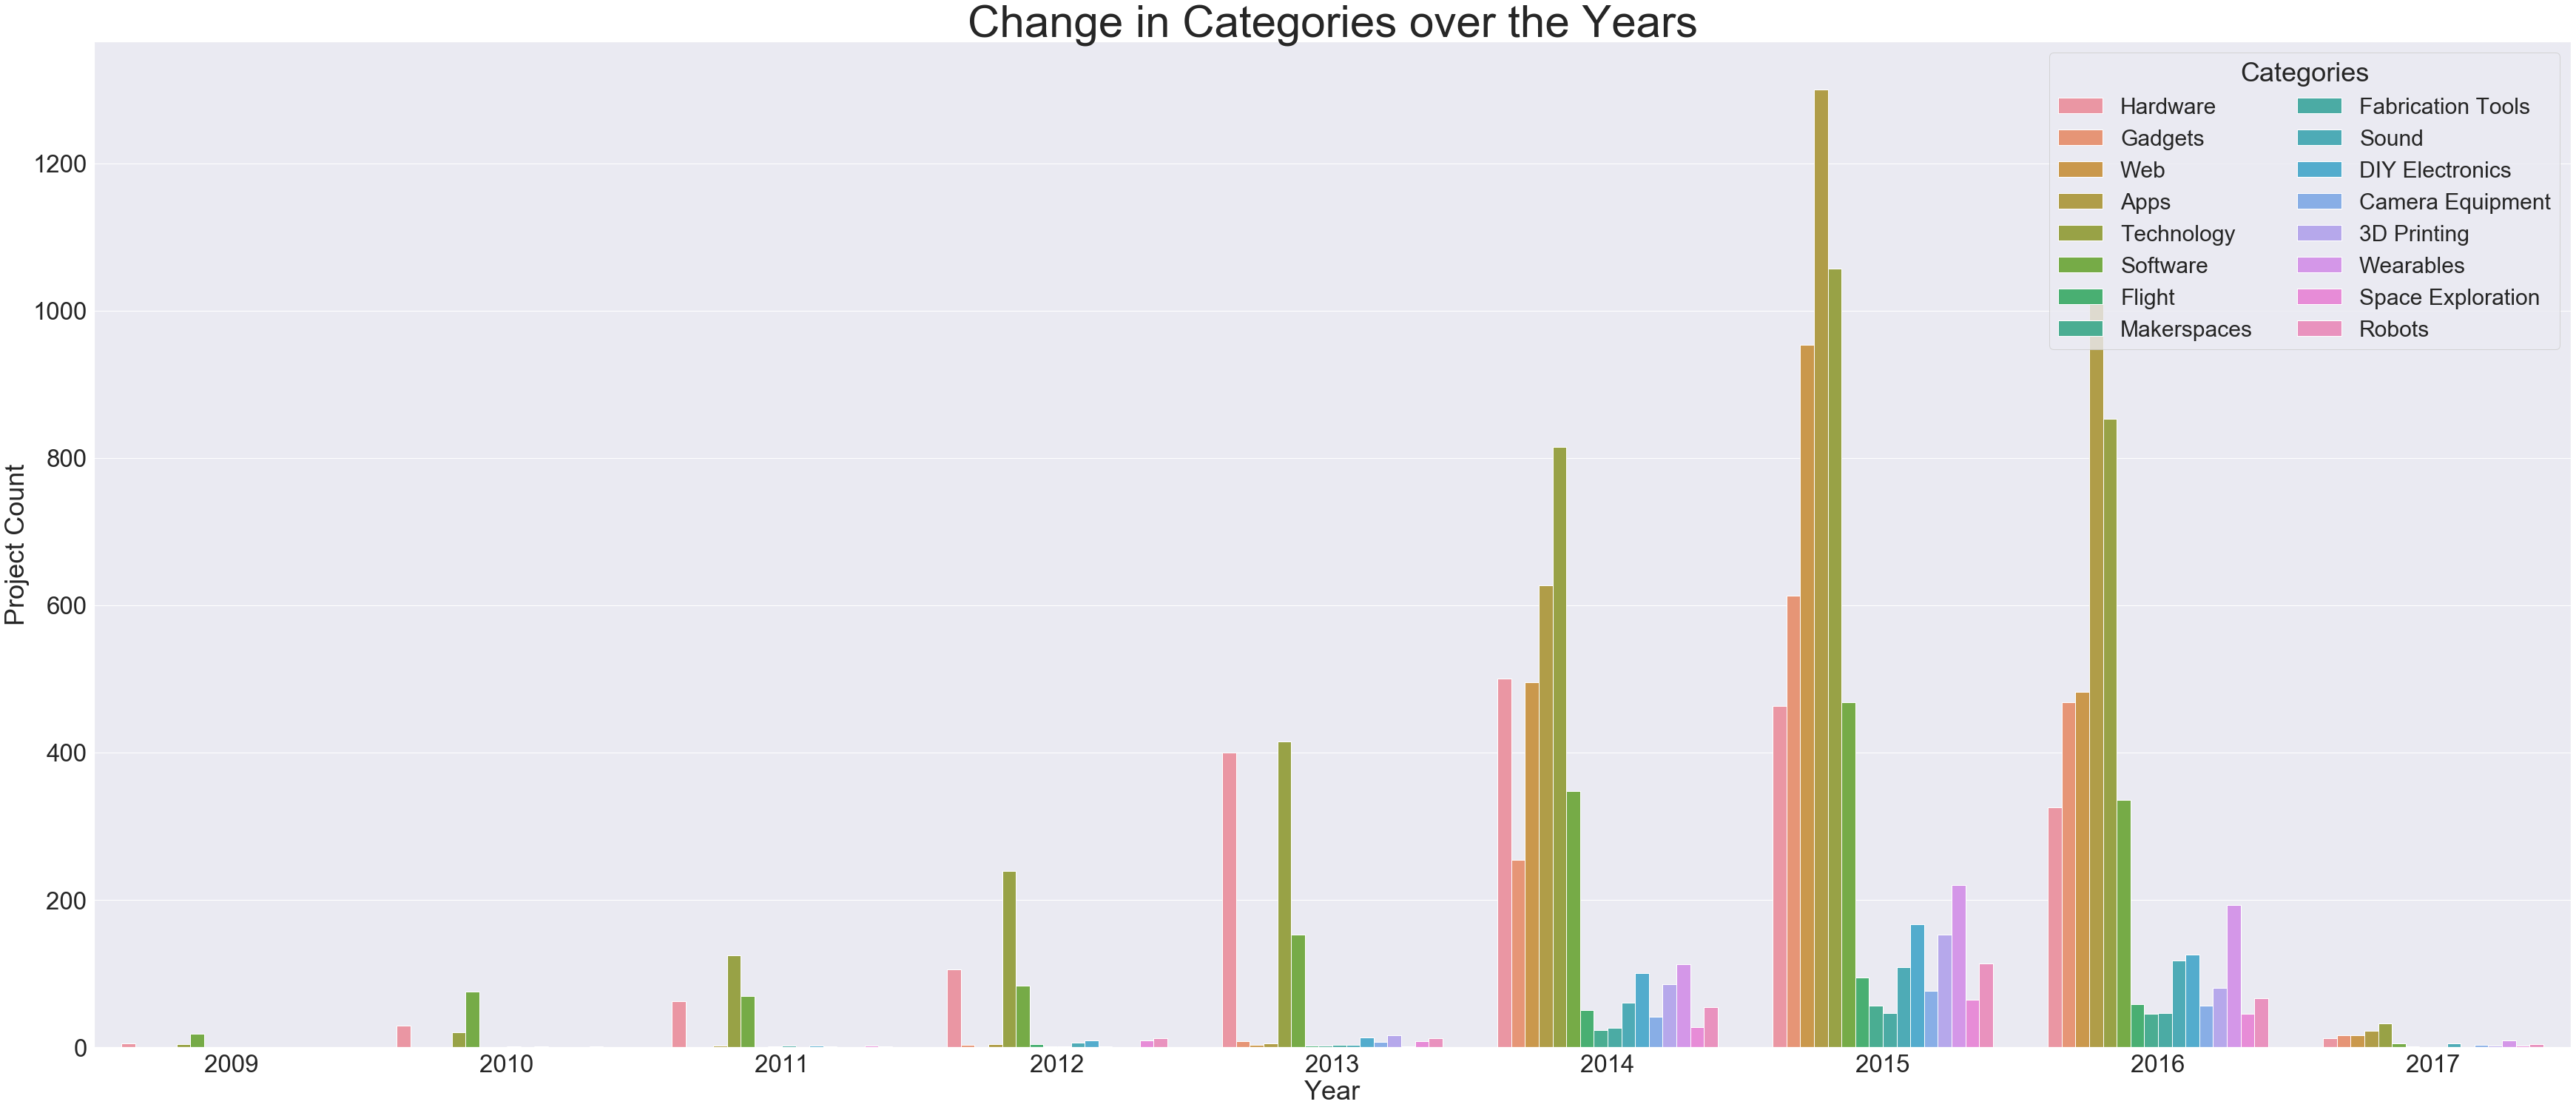

In [32]:
plt.figure(figsize=(60,25))
sns.set_style("darkgrid")
sns.set(font_scale=3)
sns.barplot(data=df1,x='Year',y='Project Count',hue='category ')
leg =plt.legend(loc='upper right',fontsize=30,markerscale=1.5,ncol=2,title='Categories')
plt.title(label="Change in Categories over the Years",loc='center',fontsize=60)
plt.show()

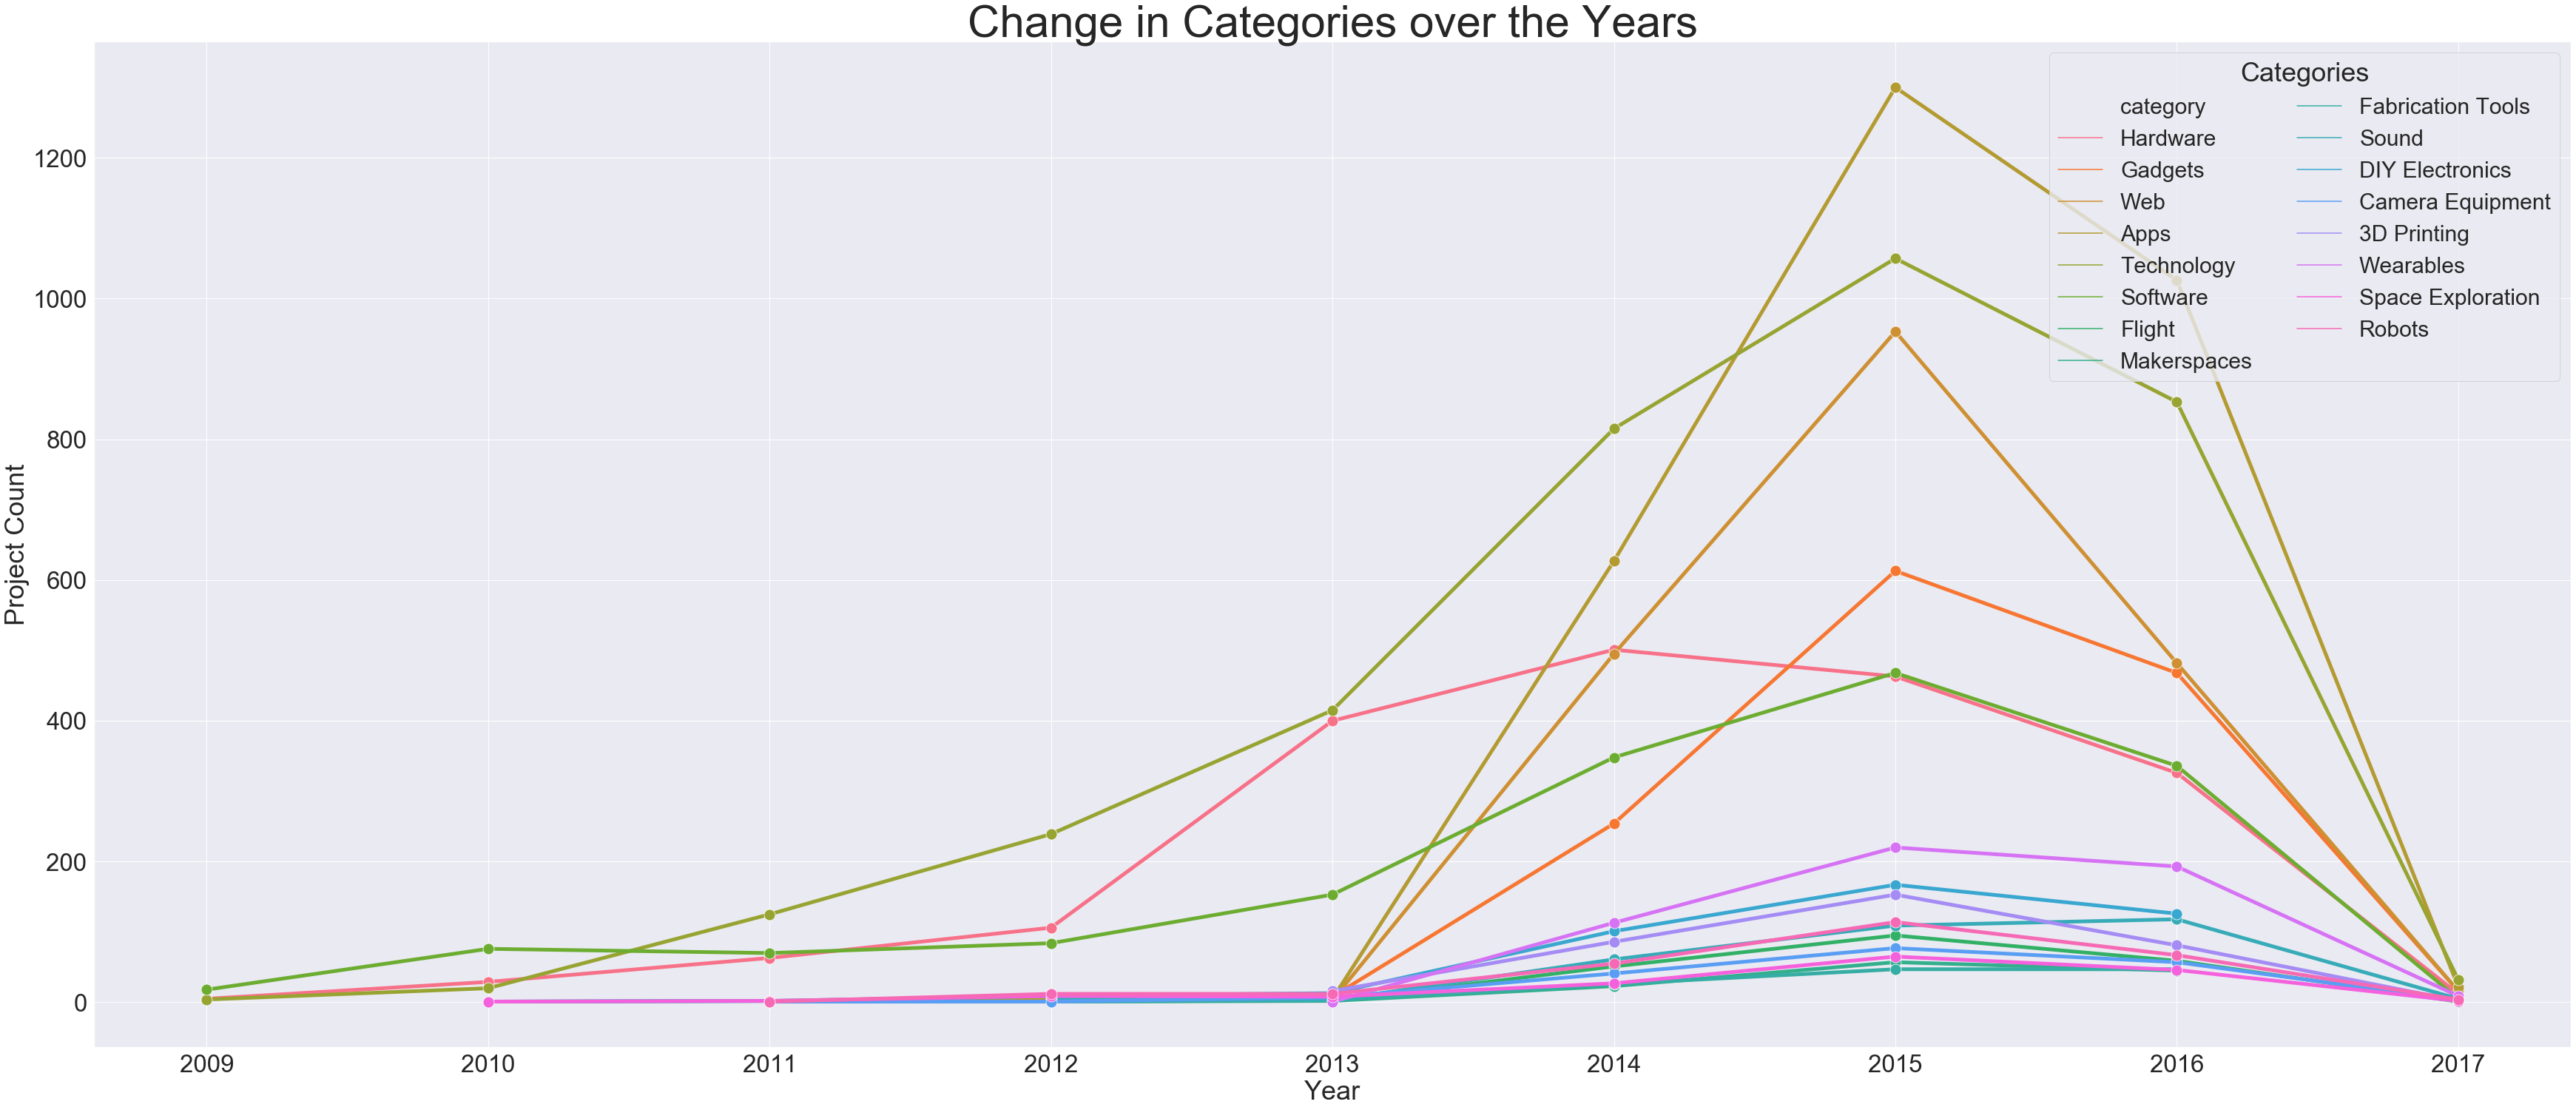

In [33]:
plt.figure(figsize=(60,25))
sns.set_style("darkgrid")
sns.set(font_scale=3)
sns.lineplot(data=df1, x='Year', y='Project Count',hue='category ',palette='husl', marker='o', markersize=15, linewidth=5)
leg =plt.legend(loc='upper right',fontsize=30,markerscale=1.5,ncol=2,title='Categories')
plt.title(label="Change in Categories over the Years",loc='center',fontsize=60)
plt.show()